# Intro

## Goal

1. The goal of this paper is to help me and other people interested in the Data Jobs Market understand better where to look for.
2. Perform exploratory analysis with Python

## Questions to answer

1. What are the most demanded skills for the top 3 most popular data roles?
2. How are in-demand skills trending for Data Analysts?
3. How well do jobs and skills pay for Data Analysts?
4. What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying)

I will focus on Europe Jobs , but the dataset contains information from all around the globe.

# Exploratory Analysis for all Data Roles
## Roles To explore

In [68]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Fitering for all jobs postings in Europe
european_countries = [
    "Albania", "Andorra", "Armenia", "Austria", "Azerbaijan", "Belarus", 
    "Belgium", "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", 
    "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Georgia", 
    "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Kazakhstan", 
    "Kosovo", "Latvia", "Liechtenstein", "Lithuania", "Luxembourg", "Malta", 
    "Moldova", "Monaco", "Montenegro", "Netherlands", "North Macedonia", "Norway", 
    "Poland", "Portugal", "Romania", "Russia", "San Marino", "Serbia", "Slovakia", 
    "Slovenia", "Spain", "Sweden", "Switzerland", "Turkey", "Ukraine", "United Kingdom", 
    "Vatican City"
]

df_europe = df[df['job_country'].isin(european_countries)].copy()

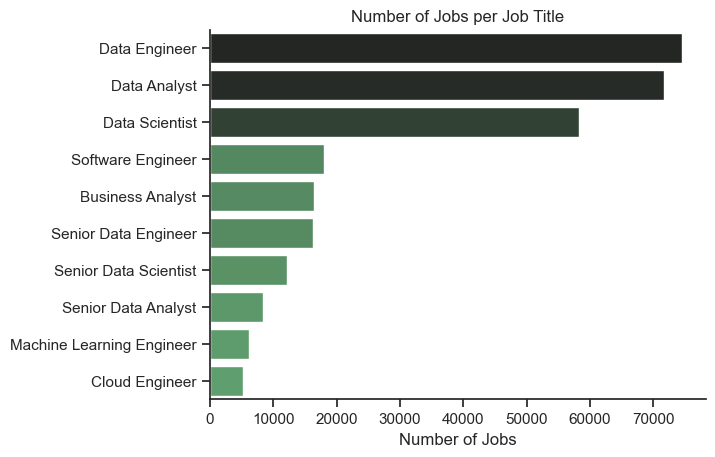

In [78]:
df_plot = df_europe['job_title_short'].value_counts().to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_title_short', hue='count', palette='dark:g_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

## Countries To Explore

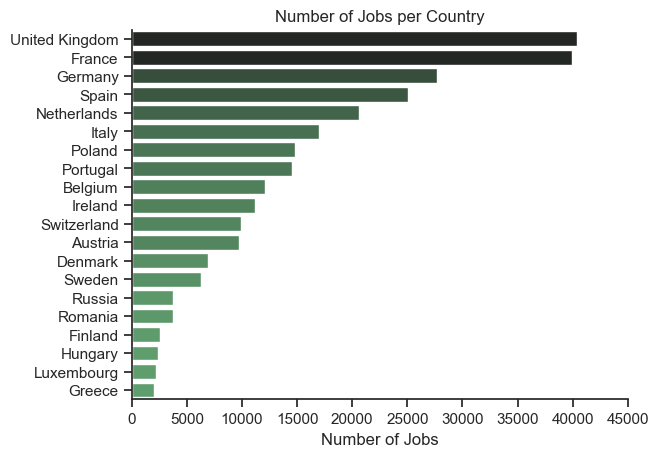

In [82]:
df_plot = df_europe['job_country'].value_counts().to_frame().head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_country', hue='count', palette='dark:g_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Country')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.xlim(0 , 45000)

plt.show()

## Companies to Explore


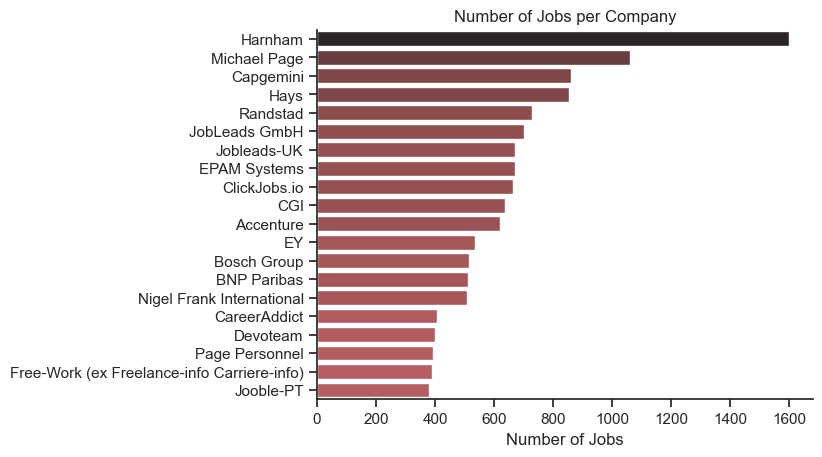

In [84]:

df_plot = df_europe['company_name'].value_counts().to_frame()[1:].head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:r_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

## Job Opportunities

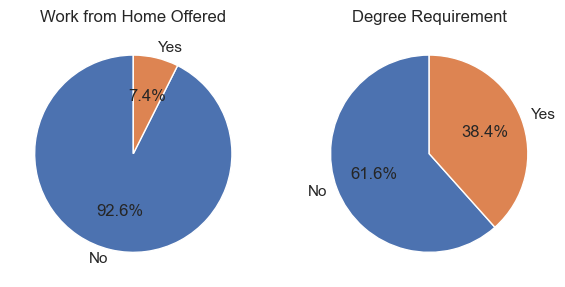

In [89]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',

}

fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_europe[column].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()